# Data Analysis on Pragmatic Tags

In [1]:
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../../utils'))

from data_processing import DataProcessing

In [2]:
pd.set_option('max_colwidth', 800)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Load Data

In [3]:
file_name = "akuapem_with_tags_dataset-verified_data.xlsx"
path = os.path.join("../../data/tagged_data", file_name)

gender_1 = "GENDER SBJ"
gender_2 = "GENDER OBJ"

In [4]:
### ONE TO MANY ###
one_to_many_df = pd.read_excel(path, sheet_name="1-M_tags")
akan_source_one = "Akan (Source, One)"
eng_target_many = "English (Target, Many)"
one_many_cols_to_rename = {"Akuapem Twi": akan_source_one, 
                  "English": eng_target_many,
                  "GENDER": gender_1,
                  "GENDER_2": gender_2
                  }
one_to_many_df.rename(columns=one_many_cols_to_rename, inplace=True)
one_to_many_df

,AUD_SIZE,STATUS,AGE,FORMALITY,GENDER SBJ,GENDER OBJ,ANIMACY,SPEECH_ACT,"Akan (Source, One)","English (Target, Many)"
0,INDIVIDUAL,NaN,PEER,INFORMAL,MASCULINE,FEMININE,ANIMATE,STATEMENT,Anadwo biara ɔfrɛ no.,He calls her every night.
1,INDIVIDUAL,NaN,PEER,INFORMAL,MASCULINE,MASCULINE,ANIMATE,STATEMENT,Anadwo biara ɔfrɛ no.,He calls him every night.
2,INDIVIDUAL,NaN,PEER,INFORMAL,FEMININE,FEMININE,ANIMATE,STATEMENT,Anadwo biara ɔfrɛ no.,She calls her every night.
3,INDIVIDUAL,NaN,PEER,INFORMAL,MASCULINE,FEMININE,ANIMATE,STATEMENT,Anadwo biara ɔfrɛ no.,He calls her every night.
4,INDIVIDUAL,NaN,PEER,INFORMAL,FEMININE,MASCULINE,ANIMATE,STATEMENT,"Anɔpa yi, ohyiaa no.",She met him this morning.
...,...,...,...,...,...,...,...,...,...,...
458,INDIVIDUAL,NaN,PEER,FORMAL,NEUTRAL,NEUTRAL,INANIMATE,STATEMENT,"Nokwarem no, osu bɛtɔ.",It is definitely going to rain.
459,INDIVIDUAL,NaN,PEER,FORMAL,NEUTRAL,NEUTRAL,INANIMATE,STATEMENT,"Nokwarem no, osu bɛtɔ.",Rain is surely on the way.
460,SMALL GROUP,NaN,PEER,INFORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Ɛsɛ sɛ yehu akokoaa foforo bi a wɔawo no foforo.,We've got to find a new babysitter.
461,SMALL GROUP,NaN,PEER,INFORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Ɛsɛ sɛ yehu akokoaa foforo bi a wɔawo no foforo.,We need to look for another babysitter.


In [5]:
one_to_many_df["STATUS"].unique()

array([nan])

In [6]:
one_to_many_df[one_to_many_df["GENDER OBJ"].isna()]

,AUD_SIZE,STATUS,AGE,FORMALITY,GENDER SBJ,GENDER OBJ,ANIMACY,SPEECH_ACT,"Akan (Source, One)","English (Target, Many)"


In [7]:
### MANY TO ONE ###
many_to_one_df = pd.read_excel(path, sheet_name="M-1_tags")
akan_source_one = "Akan (Source, Many)"
eng_target_many = "English (Target, One)"
many_one_cols_to_rename = {"Akuapem Twi": akan_source_one, 
                  "English": eng_target_many,
                  "GENDER": gender_1,
                  "GENDER.1": gender_2
                  }
many_to_one_df.rename(columns=many_one_cols_to_rename, inplace=True)
many_to_one_df

,AUD_SIZE,STATUS,AGE,FORMALITY,GENDER SBJ,GENDER OBJ,ANIMACY,SPEECH_ACT,"Akan (Source, Many)","English (Target, One)"
0,INDIVIDUAL,EQUAL,PEER,INFORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Me na mewɔ ha.,I belong here.
1,INDIVIDUAL,EQUAL,PEER,FORMAL,NEUTRAL,NEUTRAL,ANIMATE,ANSWER,Me fata sɛ mewɔ ha.,I belong here.
2,INDIVIDUAL,EQUAL,PEER,INFORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Ha na me wɔ.,I belong here.
3,INDIVIDUAL,NaN,PEER,FORMAL,MASCULINE,NaN,ANIMATE,STATEMENT,Kwaku to dwom yiye.,Kwaku sings quite well.
4,INDIVIDUAL,NaN,PEER,FORMAL,MASCULINE,NaN,ANIMATE,STATEMENT,Kwaku nim nwom to.,Kwaku sings quite well.
...,...,...,...,...,...,...,...,...,...,...
395,INDIVIDUAL,NaN,ELDER,FORMAL,NEUTRAL,NEUTRAL,ANIMATE,QUESTION,Ne su te sɛn?,What's it like?
396,INDIVIDUAL,NaN,PEER,FORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Na minhu nea menyɛ.,I ran out of ideas.
397,INDIVIDUAL,NaN,PEER,INFORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Me nsusuiɛ asa.,I ran out of ideas.
398,INDIVIDUAL,NaN,PEER,FORMAL,NEUTRAL,NEUTRAL,ANIMATE,STATEMENT,Menni adwene biara bio.,I ran out of ideas.


In [8]:
many_to_one_df[many_to_one_df["GENDER OBJ"].isna()]

,AUD_SIZE,STATUS,AGE,FORMALITY,GENDER SBJ,GENDER OBJ,ANIMACY,SPEECH_ACT,"Akan (Source, Many)","English (Target, One)"
3,INDIVIDUAL,NaN,PEER,FORMAL,MASCULINE,NaN,ANIMATE,STATEMENT,Kwaku to dwom yiye.,Kwaku sings quite well.
4,INDIVIDUAL,NaN,PEER,FORMAL,MASCULINE,NaN,ANIMATE,STATEMENT,Kwaku nim nwom to.,Kwaku sings quite well.


In [9]:
stats = {}
stats["1-M_df"] = one_to_many_df
stats["M-1_df"] = many_to_one_df
stats

{'1-M_df':         AUD_SIZE  STATUS   AGE FORMALITY GENDER SBJ GENDER OBJ    ANIMACY  \
 0     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE   FEMININE    ANIMATE   
 1     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE  MASCULINE    ANIMATE   
 2     INDIVIDUAL     NaN  PEER  INFORMAL   FEMININE   FEMININE    ANIMATE   
 3     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE   FEMININE    ANIMATE   
 4     INDIVIDUAL     NaN  PEER  INFORMAL   FEMININE  MASCULINE    ANIMATE   
 ..           ...     ...   ...       ...        ...        ...        ...   
 458   INDIVIDUAL     NaN  PEER    FORMAL    NEUTRAL    NEUTRAL  INANIMATE   
 459   INDIVIDUAL     NaN  PEER    FORMAL    NEUTRAL    NEUTRAL  INANIMATE   
 460  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 461  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 462  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 
     SPEECH_ACT                                Akan 

## Get counts for each pragmatic feature

In [10]:
def separate_by_entry(df, col_name, entry_idx):
    entry_name = df[col_name].unique()[entry_idx]
    filt_statement = df[col_name] == entry_name
    new_df = df[filt_statement]
    return new_df

In [11]:
collect_stats = {}
for sheet_df_name, df in stats.items():
    print(f"=== SHEET NAME: {sheet_df_name} ===")
    pragmatic_tag_col_names = df.columns.to_list()[:-2]
    collect_stats_per_df = {}
    for pragmatic_tag_col_name in pragmatic_tag_col_names: 
        per_prag_tags = []
        print(pragmatic_tag_col_name)
        entries = df[pragmatic_tag_col_name].unique()
        print(f" {entries}")
        for entries_idx in range(len(entries)):
            many_to_one_statement_df = separate_by_entry(df, pragmatic_tag_col_name, entries_idx)
            # store_stats = {
            #     f'{sheet_df_name}-{pragmatic_tag_col_name}-{entries[entries_idx]}': len(many_to_one_statement_df)
            # }
            store_stats_per_prag_tag_entry = {
                f'{entries[entries_idx]}': len(many_to_one_statement_df)
            }
            # print(f"Per entry: {store_stats_per_prag_tag_entry}")
            per_prag_tags.append(store_stats_per_prag_tag_entry)
        # print(per_prag_tags)
        # collect_stats_per_df[f'{sheet_df_name}-{pragmatic_tag_col_name}'] = per_prag_tags
        collect_stats_per_df[f'{pragmatic_tag_col_name}'] = per_prag_tags        
        # print(collect_stats_per_df)
    collect_stats[f"{sheet_df_name}_stats"] = collect_stats_per_df
    # print(collect_stats)

=== SHEET NAME: 1-M_df ===
AUD_SIZE
 ['INDIVIDUAL' 'SMALL GROUP' 'LARGE GROUP']
STATUS
 [nan]
AGE
 ['PEER' 'YOUNGER' 'ELDER']
FORMALITY
 ['INFORMAL' 'FORMAL']
GENDER SBJ
 ['MASCULINE' 'FEMININE' 'NEUTRAL']
GENDER OBJ
 ['FEMININE' 'MASCULINE' 'NEUTRAL']
ANIMACY
 ['ANIMATE' 'INANIMATE']
SPEECH_ACT
 ['STATEMENT' 'ANSWER' 'QUESTION' 'COMMAND' 'REQUEST']
=== SHEET NAME: M-1_df ===
AUD_SIZE
 ['INDIVIDUAL' 'SMALL GROUP' 'LARGE GROUP']
STATUS
 ['EQUAL' nan]
AGE
 ['PEER' 'ELDER' 'YOUNGER']
FORMALITY
 ['INFORMAL' 'FORMAL']
GENDER SBJ
 ['NEUTRAL' 'MASCULINE' 'FEMININE']
GENDER OBJ
 ['NEUTRAL' nan 'FEMININE' 'MASCULINE']
ANIMACY
 ['ANIMATE' 'INANIMATE']
SPEECH_ACT
 ['STATEMENT' 'ANSWER' 'QUESTION' 'COMMAND' 'REQUEST']


In [12]:
collect_stats

{'1-M_df_stats': {'AUD_SIZE': [{'INDIVIDUAL': 415},
   {'SMALL GROUP': 46},
   {'LARGE GROUP': 2}],
  'STATUS': [{'nan': 0}],
  'AGE': [{'PEER': 453}, {'YOUNGER': 6}, {'ELDER': 4}],
  'FORMALITY': [{'INFORMAL': 216}, {'FORMAL': 247}],
  'GENDER SBJ': [{'MASCULINE': 92}, {'FEMININE': 40}, {'NEUTRAL': 331}],
  'GENDER OBJ': [{'FEMININE': 37}, {'MASCULINE': 48}, {'NEUTRAL': 378}],
  'ANIMACY': [{'ANIMATE': 382}, {'INANIMATE': 81}],
  'SPEECH_ACT': [{'STATEMENT': 374},
   {'ANSWER': 3},
   {'QUESTION': 54},
   {'COMMAND': 22},
   {'REQUEST': 10}]},
 'M-1_df_stats': {'AUD_SIZE': [{'INDIVIDUAL': 363},
   {'SMALL GROUP': 19},
   {'LARGE GROUP': 18}],
  'STATUS': [{'EQUAL': 3}, {'nan': 0}],
  'AGE': [{'PEER': 361}, {'ELDER': 25}, {'YOUNGER': 14}],
  'FORMALITY': [{'INFORMAL': 202}, {'FORMAL': 198}],
  'GENDER SBJ': [{'NEUTRAL': 288}, {'MASCULINE': 83}, {'FEMININE': 29}],
  'GENDER OBJ': [{'NEUTRAL': 325},
   {'nan': 0},
   {'FEMININE': 32},
   {'MASCULINE': 41}],
  'ANIMACY': [{'ANIMATE': 364}

In [13]:
stats.update(collect_stats)
stats

{'1-M_df':         AUD_SIZE  STATUS   AGE FORMALITY GENDER SBJ GENDER OBJ    ANIMACY  \
 0     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE   FEMININE    ANIMATE   
 1     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE  MASCULINE    ANIMATE   
 2     INDIVIDUAL     NaN  PEER  INFORMAL   FEMININE   FEMININE    ANIMATE   
 3     INDIVIDUAL     NaN  PEER  INFORMAL  MASCULINE   FEMININE    ANIMATE   
 4     INDIVIDUAL     NaN  PEER  INFORMAL   FEMININE  MASCULINE    ANIMATE   
 ..           ...     ...   ...       ...        ...        ...        ...   
 458   INDIVIDUAL     NaN  PEER    FORMAL    NEUTRAL    NEUTRAL  INANIMATE   
 459   INDIVIDUAL     NaN  PEER    FORMAL    NEUTRAL    NEUTRAL  INANIMATE   
 460  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 461  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 462  SMALL GROUP     NaN  PEER  INFORMAL    NEUTRAL    NEUTRAL    ANIMATE   
 
     SPEECH_ACT                                Akan 

## Convert nested dictionary to DataFrame

In [14]:
entries = many_to_one_df.columns.unique()
print(f" {entries}")

 Index(['AUD_SIZE', 'STATUS', 'AGE', 'FORMALITY', 'GENDER SBJ', 'GENDER OBJ',
       'ANIMACY', 'SPEECH_ACT', 'Akan (Source, Many)',
       'English (Target, One)'],
      dtype='object')


In [15]:
def convert_to_dataframe(stats_dict, prefix):
    rows = []
    for category, items in stats_dict.items():
        # print(category, ",", prefix)
        for item in items:
            for key, value in item.items():
                print(f"{category} --- {key} --- {value}")
                if category in entries:
                    print(True)
                rows.append({'Category': category.replace(prefix, ''), 'SubCategory': f"{key}-{prefix}", 'Value': value})
    return pd.DataFrame(rows)

df_1M = convert_to_dataframe(stats['1-M_df_stats'], '1-M')
df_M1 = convert_to_dataframe(stats['M-1_df_stats'], 'M-1')

# Add group identifiers
df_1M['Group'] = '1-M_df_stats'
df_M1['Group'] = 'M-1_df_stats'

# Combine both DataFrames
combined_df = pd.concat([df_1M, df_M1], ignore_index=True)
combined_df


AUD_SIZE --- INDIVIDUAL --- 415
True
AUD_SIZE --- SMALL GROUP --- 46
True
AUD_SIZE --- LARGE GROUP --- 2
True
STATUS --- nan --- 0
True
AGE --- PEER --- 453
True
AGE --- YOUNGER --- 6
True
AGE --- ELDER --- 4
True
FORMALITY --- INFORMAL --- 216
True
FORMALITY --- FORMAL --- 247
True
GENDER SBJ --- MASCULINE --- 92
True
GENDER SBJ --- FEMININE --- 40
True
GENDER SBJ --- NEUTRAL --- 331
True
GENDER OBJ --- FEMININE --- 37
True
GENDER OBJ --- MASCULINE --- 48
True
GENDER OBJ --- NEUTRAL --- 378
True
ANIMACY --- ANIMATE --- 382
True
ANIMACY --- INANIMATE --- 81
True
SPEECH_ACT --- STATEMENT --- 374
True
SPEECH_ACT --- ANSWER --- 3
True
SPEECH_ACT --- QUESTION --- 54
True
SPEECH_ACT --- COMMAND --- 22
True
SPEECH_ACT --- REQUEST --- 10
True
AUD_SIZE --- INDIVIDUAL --- 363
True
AUD_SIZE --- SMALL GROUP --- 19
True
AUD_SIZE --- LARGE GROUP --- 18
True
STATUS --- EQUAL --- 3
True
STATUS --- nan --- 0
True
AGE --- PEER --- 361
True
AGE --- ELDER --- 25
True
AGE --- YOUNGER --- 14
True
FORMALITY

,Category,SubCategory,Value,Group
0,AUD_SIZE,INDIVIDUAL-1-M,415,1-M_df_stats
1,AUD_SIZE,SMALL GROUP-1-M,46,1-M_df_stats
2,AUD_SIZE,LARGE GROUP-1-M,2,1-M_df_stats
3,STATUS,nan-1-M,0,1-M_df_stats
4,AGE,PEER-1-M,453,1-M_df_stats
5,AGE,YOUNGER-1-M,6,1-M_df_stats
6,AGE,ELDER-1-M,4,1-M_df_stats
7,FORMALITY,INFORMAL-1-M,216,1-M_df_stats
8,FORMALITY,FORMAL-1-M,247,1-M_df_stats
9,GENDER SBJ,MASCULINE-1-M,92,1-M_df_stats


In [16]:
filt_non_zero = (combined_df['Value'] == 0)
zeros_combined_df = combined_df[filt_non_zero]
zeros_combined_df

,Category,SubCategory,Value,Group
3,STATUS,nan-1-M,0,1-M_df_stats
26,STATUS,nan-M-1,0,M-1_df_stats
36,GENDER OBJ,nan-M-1,0,M-1_df_stats


In [17]:
filt_non_zero = (combined_df['Value'] != 0)
combined_df = combined_df[filt_non_zero]
combined_df

,Category,SubCategory,Value,Group
0,AUD_SIZE,INDIVIDUAL-1-M,415,1-M_df_stats
1,AUD_SIZE,SMALL GROUP-1-M,46,1-M_df_stats
2,AUD_SIZE,LARGE GROUP-1-M,2,1-M_df_stats
4,AGE,PEER-1-M,453,1-M_df_stats
5,AGE,YOUNGER-1-M,6,1-M_df_stats
6,AGE,ELDER-1-M,4,1-M_df_stats
7,FORMALITY,INFORMAL-1-M,216,1-M_df_stats
8,FORMALITY,FORMAL-1-M,247,1-M_df_stats
9,GENDER SBJ,MASCULINE-1-M,92,1-M_df_stats
10,GENDER SBJ,FEMININE-1-M,40,1-M_df_stats


## Create plots

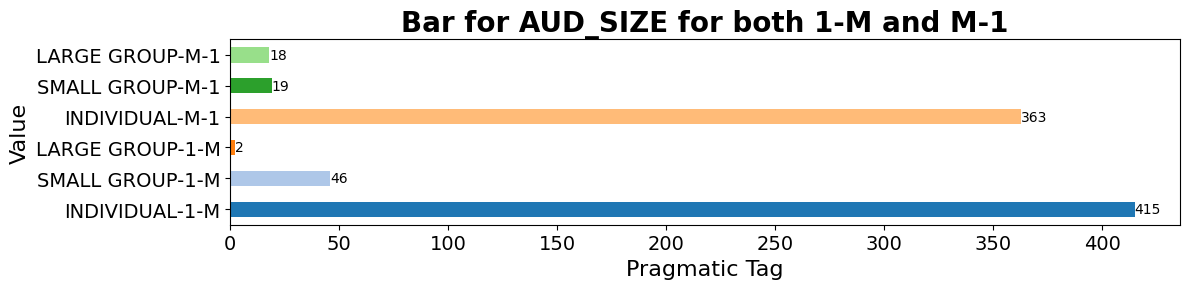

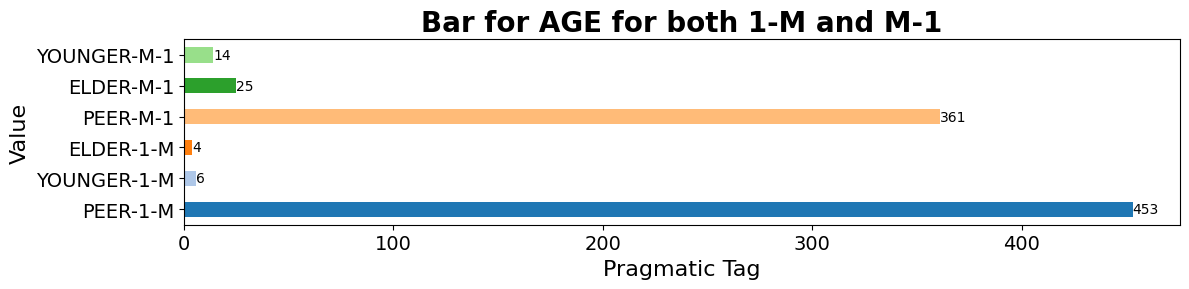

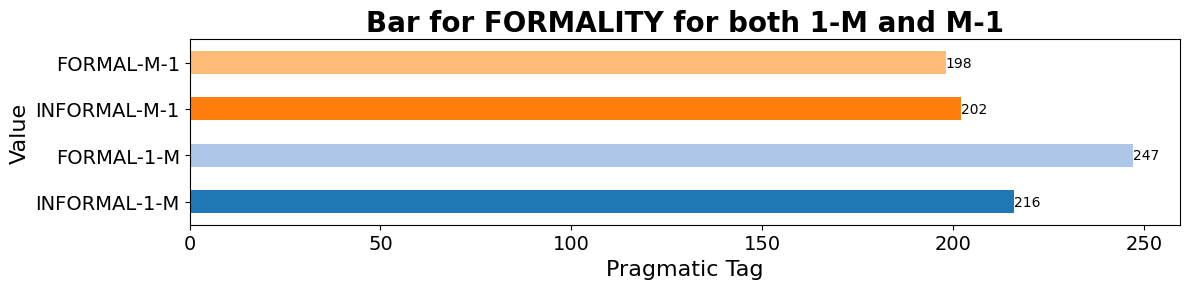

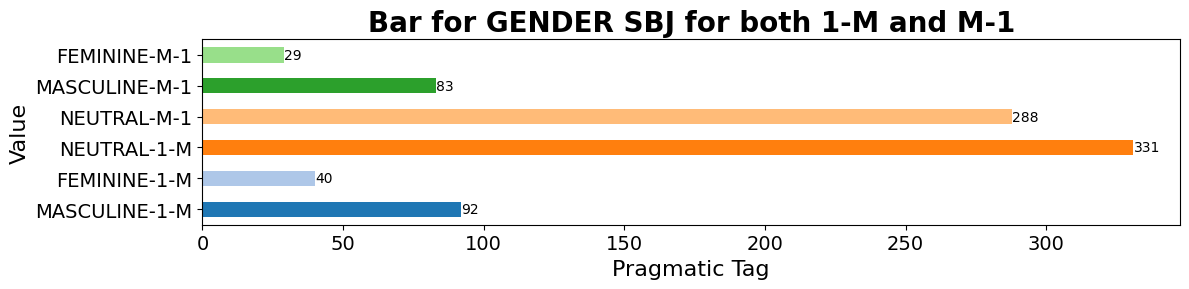

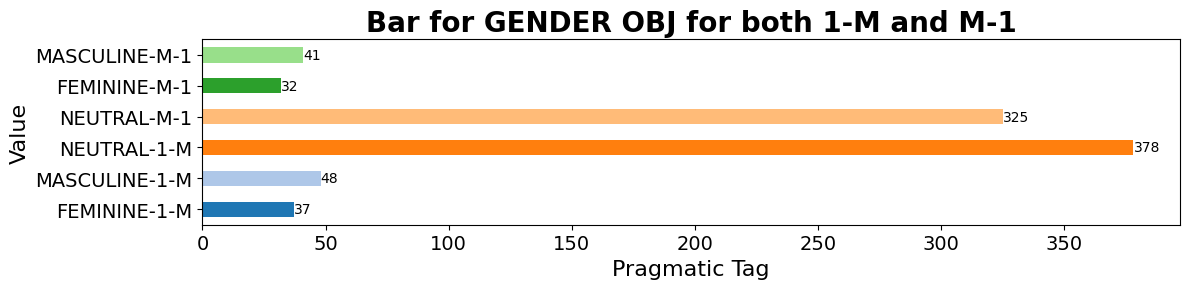

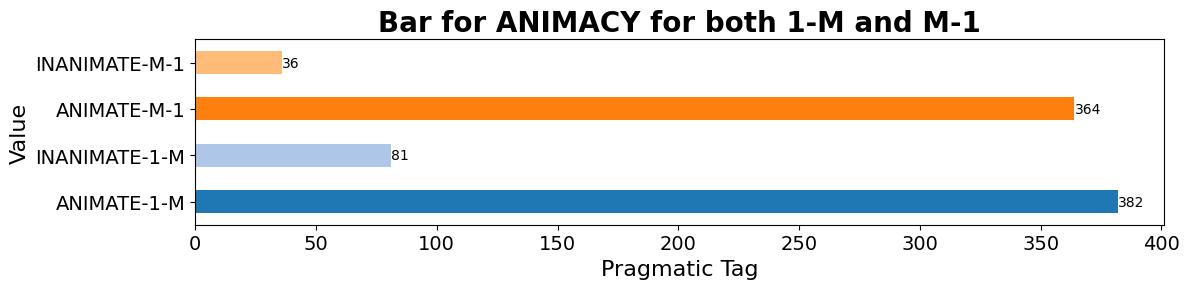

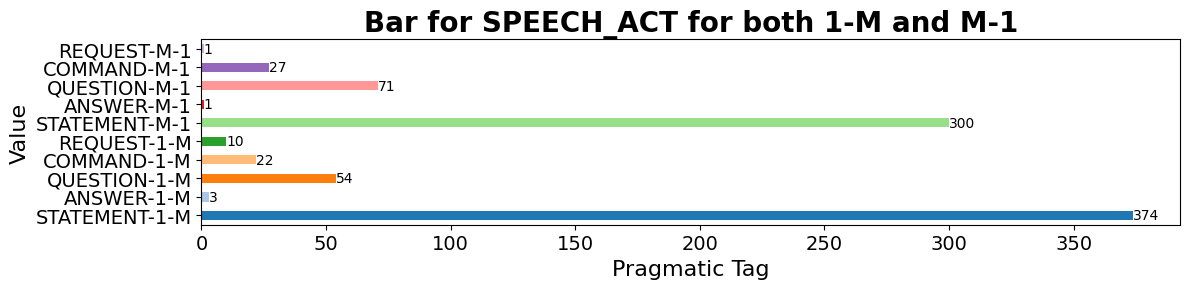

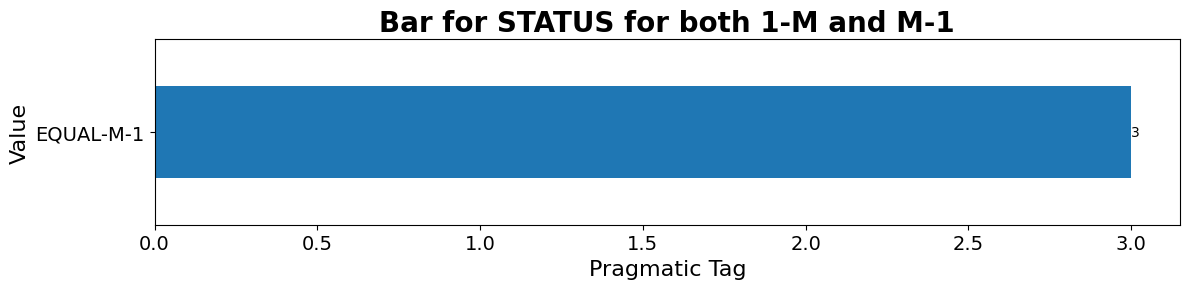

In [18]:
categories = combined_df["Category"].unique()

for categories_idx in range(len(categories)):
    category = categories[categories_idx]
    # print(category)
    filt_category = combined_df["Category"] == category
    category_df = combined_df[filt_category]

    # Create a figure and axis with custom size
    fig, ax = plt.subplots(figsize=(12, 3))

    # Plot on the custom axis
    category_df.plot.barh(
        x="SubCategory",
        y="Value",
        color=plt.cm.tab20.colors,  # Different colors
        legend=False,
        ax=ax
    )

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, label_type="edge")

    # Update text sizes
    ax.set_title(f"Bar for {category} for both 1-M and M-1", fontsize=20, fontweight='bold')
    ax.set_xlabel("Pragmatic Tag", fontsize=16)
    ax.set_ylabel("Value", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()
    plt.show()